In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataStore = '/Volume2/arunFiles/python_HSITools/crismBalancingDatasets/dataProducts/store_Composite_balancedDataset_wclassLabels.h5'
tableName = 'IF_mixedSamples'

with pd.HDFStore(dataStore, mode='r') as newstore:
    df_restored = newstore.select(tableName)
    x_batch = np.asarray(df_restored)
    x_batch = x_batch.T
    #x_batch = x_batch.reshape(x_batch.shape[0], x_batch.shape[1], 1)

In [3]:
print x_batch.shape

(240, 250000)


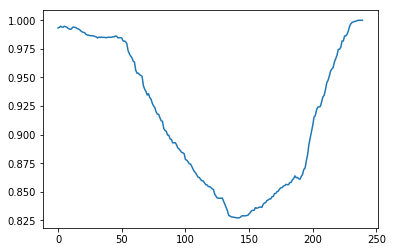

In [4]:
fig1 = plt.figure()
plt.plot(range(240), x_batch[:,0])

In [6]:
'Perform standard scaling'
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
print(scaler.fit(x_batch))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [7]:
print(len(scaler.mean_))

250000


In [8]:
x_batch_scaled = (scaler.transform(x_batch))
x_batch_scaled = x_batch_scaled

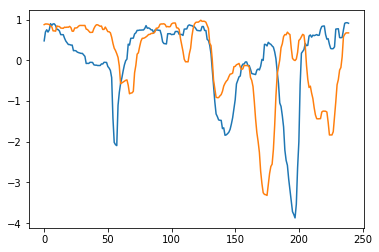

In [19]:
fig1 = plt.figure()
plt.plot(range(240), x_batch_scaled[:,16])
plt.plot(range(240), x_batch_scaled[:,17])

In [30]:
def scaleSpectra(data, scaleMin=0.02, zeroCenter=False):
    """
    This function scales every row so that it has the same minimum value.

    :param data: A numpy matrix where the rows are individual spectra.
    :param scaleMin: The difference between the maximum and minumum values (default = 0.02)
    :param zeroCenter: Each row is shifted to be centered at 0 (default = False)
    :return: scaled matrix
    """

    'First subtract 1 and set everything at 1 to 0'
    data_shft = data - 1
    'divide by the minimum in each row'
    data_min = data_shft.min(axis=1)

    data_scale = np.zeros(data.shape)

    'Scale each endmember and create plots to see what it looks like'
    for ii in range(data.shape[0]):
        temp = data_shft[ii, :] / data_min[ii]
        data_scale[ii, :] = temp * -1 * scaleMin
        #data_scale[ii, :] = temp 

    if zeroCenter:
        data_scale = data_scale - (1 - (scaleMin/2))

    return (data_scale + 1)

In [37]:
x_batch_scaled_2 = scaleSpectra(x_batch.T, scaleMin=1.8, zeroCenter=True)

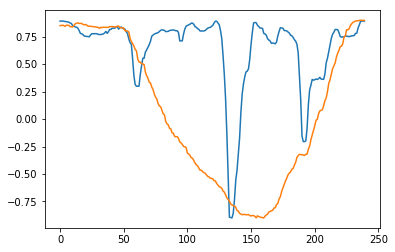

In [44]:
fig1 = plt.figure()
plt.plot(range(240), x_batch_scaled_2[10, :])
plt.plot(range(240), x_batch_scaled_2[11, :])